In [ ]:
'''
При решении задач данной лабораторной работы необходимо использовать 
функции библиотеки numpy (обязательно). Также можно (и рекомендуется) 
использовать библиотеки scipy и matplotlib (либо любую другую для построения 
графиков). 
По данной работе необходимо подготовить отчет в формате блокнота Jupyter 
Notebook (.ipynb) либо в текстовом виде (.pdf).
Задача 2 (6 баллов). В файле «data2.csv» представлены данные наблюдений о прибыли 
(второй столбец) в зависимости от установленной скидки (первый столбец). 
Комментарий. На самом деле эти данные сгенерированы синтетически, в учебных 
целях, но смысл значений в этой задаче не важен, и эти данные можно рассматривать как 
реальный датасет. 
Бизнес-консультанты считают, что реальная зависимость прибыли от установленной 
скидки может быть описана квадратичной или кубической функцией (то есть полиномом 
второй или третьей степени, f(x) = a2x2+a1x+a0 или f(x) = a3x3+a2x2+a1x+a0). 
1. Сформируйте систему линейных уравнений (СЛУ) для полинома 2й степени (для 
этого нужно выбрать 3 точки, в которых значение полинома должно совпадать с 
исходными данными; точки лучше выбирать равномерно «разбросанными» по исходным 
данным, то есть одна в начале имеющегося диапазона данных, одна в конце и одна в 
середине). 
2. Решите СЛУ (с помощью scipy.linalg.solve), тем самым найдя коэффициенты полинома. 
3. Получите вектор значений построенного полинома для заданных точек. 
4. Постройте в одной области два графика: один по заданным в файле точкам, другой – 
по полученному вектору. 
5. Посчитайте значение квадратичного отклонения RSS (оно вычисляется по формуле 
RSS = ∑ (𝑦𝑖−𝑓(𝑥𝑖))2, i=(от 1 до n),
где yi – ожидаемые значения (из исходного файла), f(xi) – рассчитанные значения полинома. 
6. Повторите шаги 1-5 для полинома 3й степени (для этого нужно будет выбрать 4 точки). 
7 (по желанию). Можно поэкспериментировать с выбором точек для построения полиномов. 
8. Выберите тот вариант, где значение отклонения (RSS) получается наименьшим. Для 
этого варианта посчитайте ожидаемое значение прибыли при значениях скидки в 6 и 8 
процентов.
'''

In [15]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

In [ ]:
# 1. Формирование системы линейных уравнений (СЛУ) для полинома 2й степени (для 
#этого нужно выбрать 3 точки, в которых значение полинома должно совпадать с 
#исходными данными; точки лучше выбирать равномерно «разбросанными» по исходным 
#данным, то есть одна в начале имеющегося диапазона данных, одна в конце и одна в 
#середине). 

In [16]:
# Функция для проверки массива
def check_array_properties(data, name):
    print(f"Свойства массива {name}:")
    print(f"  Размерность: {data.ndim}")  # Размерность массива
    print(f"  Форма: {data.shape}")      # Форма массива
    print(f"  Тип данных: {data.dtype}")  # Тип данных
    print()

# Загрузка данных из CSV файла
data = np.genfromtxt('data2.csv', delimiter=';', dtype=float)
data[0][0] = 0 # по дефолту загружает "п»ї0" (nan), поэтому заменяем на 0
check_array_properties(data, 'data')
print(data)

Свойства массива data:
  Размерность: 2
  Форма: (26, 2)
  Тип данных: float64

[[ 0.         -7.69796582]
 [ 0.2        -6.57266488]
 [ 0.4        -5.37046782]
 [ 0.6        -3.15858504]
 [ 0.8        -1.48270657]
 [ 1.         -0.12384439]
 [ 1.2         2.40389623]
 [ 1.4         4.14683298]
 [ 1.6         6.32790239]
 [ 1.8         8.82291549]
 [ 2.         10.88542758]
 [ 2.2        13.31557662]
 [ 2.4        15.47213024]
 [ 2.6        17.26743396]
 [ 2.8        18.81843147]
 [ 3.         20.6263378 ]
 [ 3.2        23.04006768]
 [ 3.4        23.92053257]
 [ 3.6        25.32216894]
 [ 3.8        26.52298732]
 [ 4.         26.76261011]
 [ 4.2        27.65896563]
 [ 4.4        27.35973442]
 [ 4.6        27.37007024]
 [ 4.8        26.15215361]
 [ 5.         25.23920411]]


In [17]:
# Первый столбец (скидка)
discounts = data[:, 0]
check_array_properties(discounts, 'discounts')
print(discounts)

Свойства массива discounts:
  Размерность: 1
  Форма: (26,)
  Тип данных: float64

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]


In [18]:
# Второй столбец (прибыль)
profits = data[:, 1]
check_array_properties(profits, 'profits')
print(profits)

Свойства массива profits:
  Размерность: 1
  Форма: (26,)
  Тип данных: float64

[-7.69796582 -6.57266488 -5.37046782 -3.15858504 -1.48270657 -0.12384439
  2.40389623  4.14683298  6.32790239  8.82291549 10.88542758 13.31557662
 15.47213024 17.26743396 18.81843147 20.6263378  23.04006768 23.92053257
 25.32216894 26.52298732 26.76261011 27.65896563 27.35973442 27.37007024
 26.15215361 25.23920411]


In [19]:
# Выбор трех точек: первая, средняя и последняя
indices = [0, len(discounts) // 2, -1]
x_points = discounts[indices]
y_points = profits[indices]

check_array_properties(x_points, 'x_points')
print(x_points)

check_array_properties(y_points, 'y_points')
print(y_points)

Свойства массива x_points:
  Размерность: 1
  Форма: (3,)
  Тип данных: float64

[0.  2.6 5. ]
Свойства массива y_points:
  Размерность: 1
  Форма: (3,)
  Тип данных: float64

[-7.69796582 17.26743396 25.23920411]


In [20]:
# Составление системы линейных уравнений
f2 = np.vstack([x_points**2, x_points, np.ones(len(x_points))]).T

In [21]:
#2. Решение СЛУ (с помощью scipy.linalg.solve), тем самым найдя коэффициенты полинома
f2_coefficients = solve(f2, y_points)
f2_a2, f2_a1, f2_a0 = f2_coefficients
print("Коэффициенты полинома второй степени:")
print(f'a2 = {f2_a2} ; a1 = {f2_a1} ; a0 = {f2_a0}')

Коэффициенты полинома второй степени:
a2 = -1.2561011883717947 ; a1 = 12.867939927458975 ; a0 = -7.697965818


In [22]:
#3. Получение вектора значений построенного полинома второй степени для заданных точек. 
f2_x = f2_a2 * discounts**2 + f2_a1 * discounts + f2_a0
print(f2_x)

[-7.69796582 -5.17462188 -2.75176604 -0.42939829  1.79248136  3.91387292
  5.93477638  7.85519175  9.67511902 11.3945582  13.01350928 14.53197227
 15.94994716 17.26743396 18.48443266 19.60094327 20.61696578 21.5325002
 22.34754652 23.06210475 23.67617488 24.18975691 24.60285086 24.9154567
 25.12757445 25.23920411]


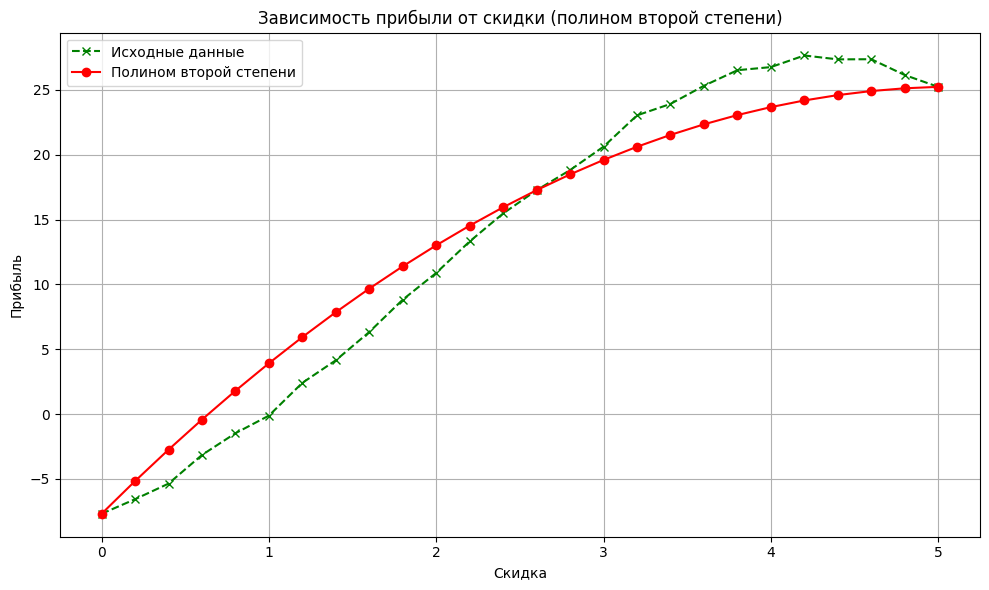

In [23]:
# 4. Постройте в одной области два графика: один по заданным в файле точкам, другой – по полученному вектору. 
plt.figure(figsize=(10, 6))
plt.plot(discounts, profits, color='green', label='Исходные данные',marker='x', linestyle='--')
plt.plot(discounts, f2_x, color='red', label='Полином второй степени',marker='o', linestyle='-')
plt.xlabel('Скидка')
plt.ylabel('Прибыль')
plt.title('Зависимость прибыли от скидки (полином второй степени)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [24]:
#5. Посчитайте значение квадратичного отклонения RSS (оно вычисляется по формуле RSS = ∑ (𝑦𝑖−𝑓(𝑥𝑖))2, i=(от 1 до n),
# где yi – ожидаемые значения (из исходного файла), f(xi) – рассчитанные значения полинома. 
rss_f2 = np.sum((profits - f2_x)**2)
print(f'RSS для полинома второй степени: {rss_f2}')

RSS для полинома второй степени: 163.36349055625138


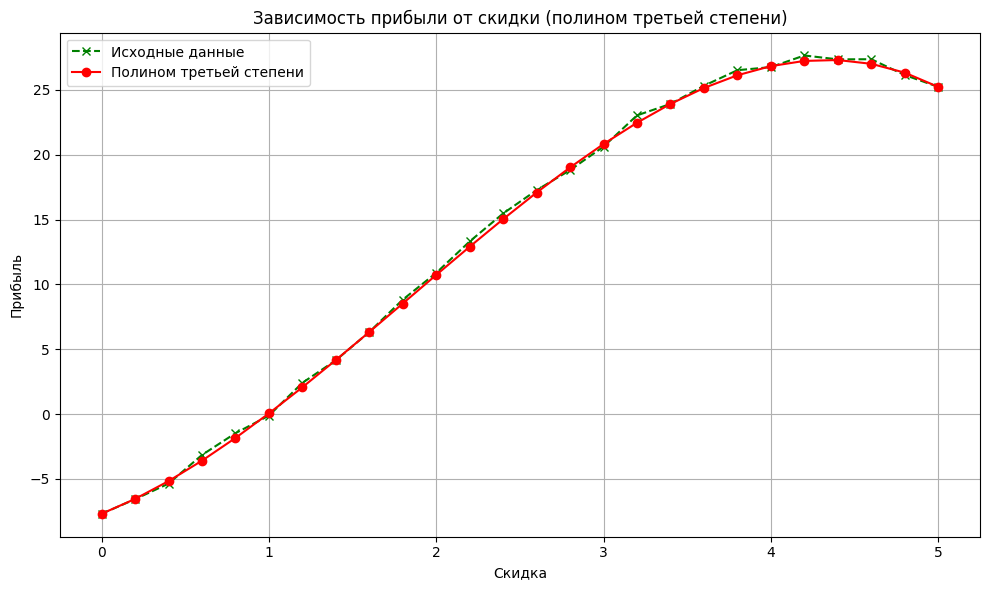

RSS для полинома третьей степени: 1.9542145464333618


In [25]:
#6. Повторите шаги 1-5 для полинома 3й степени (для этого нужно будет выбрать 4 точки). 
# Выбор четырех точек: первая, две средние (делим массив на 3 части и берём точки через треть) и последняя
indices_f3 = [0, len(discounts) // 3, 2 * len(discounts) // 3, -1]
x_points_f3 = discounts[indices_f3]
y_points_f3 = profits[indices_f3]

# Составление системы линейных уравнений для полинома третьей степени и решение СЛУ
f3 = np.vstack([x_points_f3**3, x_points_f3**2, x_points_f3, np.ones(len(x_points_f3))]).T
f3_coefficients = solve(f3, y_points_f3)
f3_a3, f3_a2, f3_a1, f3_a0 = f3_coefficients

# Получение вектора значений полинома третьей степени
f3_x = f3_a3 * discounts**3 + f3_a2 * discounts**2 + f3_a1 * discounts + f3_a0

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(discounts, profits, color='green', label='Исходные данные',marker='x', linestyle='--')
plt.plot(discounts, f3_x, color='red', label='Полином третьей степени',marker='o', linestyle='-')
plt.xlabel('Скидка')
plt.ylabel('Прибыль')
plt.title('Зависимость прибыли от скидки (полином третьей степени)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Вычисление RSS для полинома третьей степени
rss_f3 = np.sum((profits - f3_x)**2)
print(f'RSS для полинома третьей степени: {rss_f3}')

In [26]:
#8. Выберите тот вариант, где значение отклонения (RSS) получается наименьшим. Для 
# этого варианта посчитайте ожидаемое значение прибыли при значениях скидки в 6 и 8 процентов.
# Определение наилучшего полинома
predicted_discounts = np.array([6, 8])
if rss_f2 < rss_f3:
    print("Выбран полином второй степени.")
    best_coefficients = f2_coefficients
    # Ожидаемое значение прибыли при скидках 6% и 8%
    predicted_profits = best_coefficients[0] * predicted_discounts**2 + best_coefficients[1] * predicted_discounts + best_coefficients[2]
    print(f'Ожидаемая прибыль при скидке 6%: {predicted_profits[0]}')
    print(f'Ожидаемая прибыль при скидке 8%: {predicted_profits[1]}')   
else:
    print("Выбран полином третьей степени.")
    best_coefficients = f3_coefficients
    # Ожидаемое значение прибыли при скидках 6% и 8%
    predicted_profits = best_coefficients[0] * predicted_discounts**3 + best_coefficients[1] * predicted_discounts**2 + best_coefficients[2] * predicted_discounts + best_coefficients[3]
    print(f'Ожидаемая прибыль при скидке 6%: {predicted_profits[0]}')
    print(f'Ожидаемая прибыль при скидке 8%: {predicted_profits[1]}')

Выбран полином третьей степени.
Ожидаемая прибыль при скидке 6%: 12.519132880207817
Ожидаемая прибыль при скидке 8%: -60.342480490455
